In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('C:\\Users\\Mkarry\\CC GENERAL.csv', sep= ',')

In [14]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data = data.drop('CUST_ID',axis=1,inplace=True)

AttributeError: 'NoneType' object has no attribute 'head'

In [18]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [17]:
data.drop('CUST_ID', inplace=True, axis=1)

In [20]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [21]:
data.drop('MINIMUM_PAYMENTS', inplace=True, axis=1)

In [23]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

In [25]:
import sklearn.metrics as metrics

In [38]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [39]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8932
1      18
dtype: int64

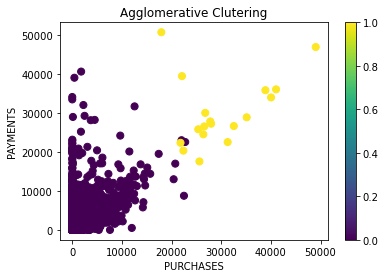

In [42]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)


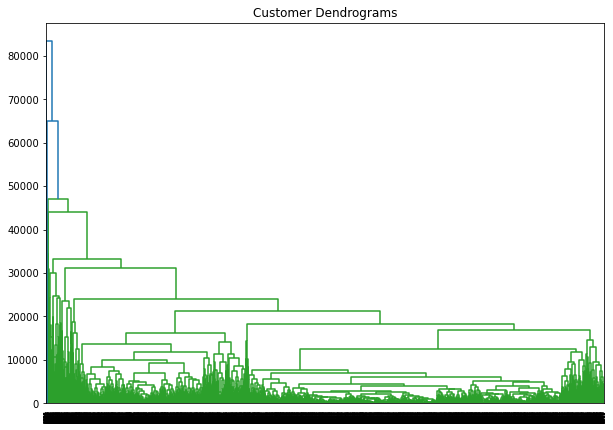

In [44]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

# K mean 

In [46]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [48]:
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

2    5303
0    2510
3     821
1     292
4      24
dtype: int64

In [49]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[1.74507301e+03 9.09668973e-01 1.32934749e+03 8.13841004e+02
  5.15911135e+02 9.98126791e+02 5.64255108e-01 3.10317269e-01
  3.95155495e-01 1.34285699e-01 3.26015936e+00 1.97792829e+01
  6.38117651e+03 2.00442834e+03 1.82279248e-01 1.17438247e+01]
 [4.16415393e+03 9.19413205e-01 4.05268219e+03 2.52666575e+03
  1.52609178e+03 6.04129962e+03 5.61294318e-01 3.77783079e-01
  4.32677322e-01 3.40758716e-01 1.25376712e+01 4.52910959e+01
  9.58511831e+03 1.15897916e+04 2.13263092e-01 1.17534247e+01]
 [7.77161309e+02 8.48537333e-01 4.77802621e+02 2.27473917e+02
  2.50627028e+02 4.57916525e+02 4.46286467e-01 1.23131503e-01
  3.45139160e-01 1.08129214e-01 2.24853856e+00 9.11201207e+00
  2.14670281e+03 8.38721601e+02 1.44560797e-01 1.13667735e+01]
 [5.06086377e+03 9.46468737e-01 1.54715935e+03 9.62780146e+02
  5.84460755e+02 2.46772023e+03 5.11553403e-01 3.04024650e-01
  3.60486206e-01 2.41359384e-01 6.39342266e+00 2.11814860e+01
  1.17414738e+04 2.40968005e+03 9.38824872e-02 1.17015834e+01]
 [5.

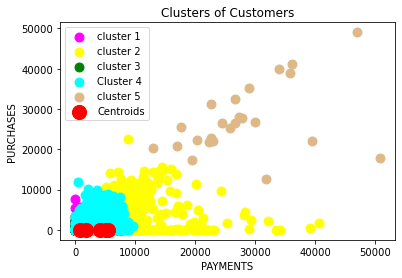

In [55]:

#K-means plot
plt.scatter(data["PAYMENTS"] [labels[0]==0],          
            data["PURCHASES"][labels[0]==0],s=80,c='magenta',label='cluster 1')

plt.scatter(data["PAYMENTS"][labels[0]==1],
           data["PURCHASES"][labels[0]== 1],s=80,c='yellow',label='cluster 2')

plt.scatter(data["PAYMENTS"][labels[0]==2],
           data["PURCHASES"][labels[0]==2],s=80,c='green',label='cluster 3')

plt.scatter(data["PAYMENTS"][labels[0]==3], 
           data["PURCHASES"][labels[0]==3],s=80,c='cyan',label='Cluster 4')

plt.scatter(data["PAYMENTS"] [labels[0]==4], 
           data["PURCHASES"][labels[0]==4],s=80,c='burlywood',label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [63]:
from sklearn.cluster import KMeans
Sum_of_squared_distances=[]
k = range(1,15)
for k in k:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

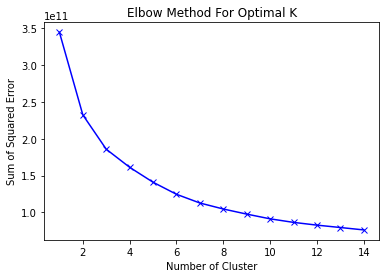

In [69]:
plt.plot(range(1, 15), Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method For Optimal K')
plt.show()

In [70]:
#Using the elbow method, we pick 3 for the number of clusters 